In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

Using TensorFlow backend.


In [3]:
df = pd.read_csv("thoracicsurgerydata.csv")

In [4]:
df.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [5]:
df.dtypes

id           int64
DGN         object
PRE4       float64
PRE5       float64
PRE6        object
PRE7        object
PRE8        object
PRE9        object
PRE10       object
PRE11       object
PRE14       object
PRE17       object
PRE19       object
PRE25       object
PRE30       object
PRE32       object
AGE          int64
Risk1Yr     object
dtype: object

In [6]:
df1 = df

In [7]:
# Drop id field they are unique identifiers
del df1['id']

# Change true/false to numeric values
df1.replace({
    'T':1,
    'F':0,
},inplace=True)

# Sanitize data to be represented in numeric values
df1 = df1.applymap(lambda x: str(x).strip('OC'))
df1 = df1.applymap(lambda x: str(x).strip('PRZ'))
df1 = df1.applymap(lambda x: str(x).strip('DGN'))

# Change data types to int
df1 = df1.apply(pd.to_numeric)

In [8]:
df1.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,12,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,11,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,11,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,11,0,0,0,1,0,73,1


In [9]:
df1.dtypes

DGN          int64
PRE4       float64
PRE5       float64
PRE6         int64
PRE7         int64
PRE8         int64
PRE9         int64
PRE10        int64
PRE11        int64
PRE14        int64
PRE17        int64
PRE19        int64
PRE25        int64
PRE30        int64
PRE32        int64
AGE          int64
Risk1Yr      int64
dtype: object

In [10]:
df.shape

(470, 17)

/Users/harishgopinath/3.6env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/harishgopinath/3.6env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/harishgopinath/3.6env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/harishgopinath/3

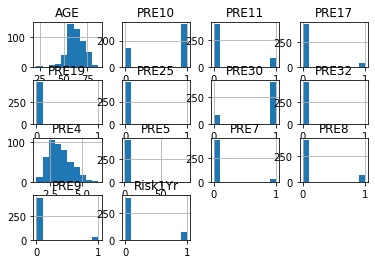

In [11]:
df.hist()
plt.show()

In [12]:
X = df1.values[:,0:16]

In [13]:
Y = df.values[:,16]

In [14]:
# Create the model
model = Sequential()
model.add(Dense(128, input_dim=16, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               2176      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 12,545
Trainable params: 12,545
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile Model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
# Fit the model
model.fit(X, Y, epochs=500, batch_size=25)


Epoch 1/500
470/470 [==============================] - 0s 479us/step - loss: 1.2467 - accuracy: 0.7340
Epoch 2/500
470/470 [==============================] - 0s 65us/step - loss: 0.4710 - accuracy: 0.8511
Epoch 3/500
470/470 [==============================] - 0s 66us/step - loss: 0.4571 - accuracy: 0.8511
Epoch 4/500
470/470 [==============================] - 0s 65us/step - loss: 0.4365 - accuracy: 0.8511
Epoch 5/500
470/470 [==============================] - 0s 65us/step - loss: 0.4323 - accuracy: 0.8511
Epoch 6/500
470/470 [==============================] - 0s 64us/step - loss: 0.4341 - accuracy: 0.8511
Epoch 7/500
470/470 [==============================] - 0s 61us/step - loss: 0.4246 - accuracy: 0.8511
Epoch 8/500
470/470 [==============================] - 0s 59us/step - loss: 0.4493 - accuracy: 0.8511
Epoch 9/500
470/470 [==============================] - 0s 64us/step - loss: 0.4469 - accuracy: 0.8511
Epoch 10/500
470/470 [==============================] - 0s 62us/step - loss: 0.4

470/470 [==============================] - 0s 53us/step - loss: 0.3971 - accuracy: 0.8468
Epoch 79/500
470/470 [==============================] - 0s 50us/step - loss: 0.4015 - accuracy: 0.8532
Epoch 80/500
470/470 [==============================] - 0s 50us/step - loss: 0.3954 - accuracy: 0.8574
Epoch 81/500
470/470 [==============================] - 0s 51us/step - loss: 0.3913 - accuracy: 0.8553
Epoch 82/500
470/470 [==============================] - 0s 52us/step - loss: 0.4102 - accuracy: 0.8532
Epoch 83/500
470/470 [==============================] - 0s 53us/step - loss: 0.3901 - accuracy: 0.8511
Epoch 84/500
470/470 [==============================] - 0s 50us/step - loss: 0.3931 - accuracy: 0.8553
Epoch 85/500
470/470 [==============================] - 0s 52us/step - loss: 0.4009 - accuracy: 0.8511
Epoch 86/500
470/470 [==============================] - 0s 50us/step - loss: 0.3968 - accuracy: 0.8553
Epoch 87/500
470/470 [==============================] - 0s 53us/step - loss: 0.3996 - 

470/470 [==============================] - 0s 52us/step - loss: 0.3813 - accuracy: 0.8532
Epoch 158/500
470/470 [==============================] - 0s 50us/step - loss: 0.3673 - accuracy: 0.8553
Epoch 159/500
470/470 [==============================] - 0s 51us/step - loss: 0.3645 - accuracy: 0.8596
Epoch 160/500
470/470 [==============================] - 0s 50us/step - loss: 0.3739 - accuracy: 0.8553
Epoch 161/500
470/470 [==============================] - 0s 52us/step - loss: 0.3638 - accuracy: 0.8660
Epoch 162/500
470/470 [==============================] - 0s 50us/step - loss: 0.3699 - accuracy: 0.8660
Epoch 163/500
470/470 [==============================] - 0s 50us/step - loss: 0.3708 - accuracy: 0.8574
Epoch 164/500
470/470 [==============================] - 0s 50us/step - loss: 0.3735 - accuracy: 0.8574
Epoch 165/500
470/470 [==============================] - 0s 50us/step - loss: 0.3657 - accuracy: 0.8596
Epoch 166/500
470/470 [==============================] - 0s 48us/step - loss: 

470/470 [==============================] - 0s 49us/step - loss: 0.3410 - accuracy: 0.8766
Epoch 236/500
470/470 [==============================] - 0s 52us/step - loss: 0.3568 - accuracy: 0.8745
Epoch 237/500
470/470 [==============================] - 0s 48us/step - loss: 0.3383 - accuracy: 0.8723
Epoch 238/500
470/470 [==============================] - 0s 51us/step - loss: 0.3373 - accuracy: 0.8745
Epoch 239/500
470/470 [==============================] - 0s 50us/step - loss: 0.3424 - accuracy: 0.8766
Epoch 240/500
470/470 [==============================] - 0s 52us/step - loss: 0.3480 - accuracy: 0.8745
Epoch 241/500
470/470 [==============================] - 0s 50us/step - loss: 0.3540 - accuracy: 0.8660
Epoch 242/500
470/470 [==============================] - 0s 50us/step - loss: 0.3414 - accuracy: 0.8766
Epoch 243/500
470/470 [==============================] - 0s 50us/step - loss: 0.3403 - accuracy: 0.8766
Epoch 244/500
470/470 [==============================] - 0s 51us/step - loss: 

470/470 [==============================] - 0s 51us/step - loss: 0.3130 - accuracy: 0.8851
Epoch 314/500
470/470 [==============================] - 0s 50us/step - loss: 0.3047 - accuracy: 0.8894
Epoch 315/500
470/470 [==============================] - 0s 48us/step - loss: 0.3089 - accuracy: 0.8915
Epoch 316/500
470/470 [==============================] - 0s 50us/step - loss: 0.3105 - accuracy: 0.8851
Epoch 317/500
470/470 [==============================] - 0s 50us/step - loss: 0.3009 - accuracy: 0.8915
Epoch 318/500
470/470 [==============================] - 0s 53us/step - loss: 0.2944 - accuracy: 0.8936
Epoch 319/500
470/470 [==============================] - 0s 51us/step - loss: 0.2940 - accuracy: 0.8957
Epoch 320/500
470/470 [==============================] - 0s 50us/step - loss: 0.2966 - accuracy: 0.8915
Epoch 321/500
470/470 [==============================] - 0s 50us/step - loss: 0.2986 - accuracy: 0.8936
Epoch 322/500
470/470 [==============================] - 0s 51us/step - loss: 

470/470 [==============================] - 0s 51us/step - loss: 0.2633 - accuracy: 0.9021
Epoch 392/500
470/470 [==============================] - 0s 50us/step - loss: 0.2641 - accuracy: 0.9000
Epoch 393/500
470/470 [==============================] - 0s 50us/step - loss: 0.2642 - accuracy: 0.9085
Epoch 394/500
470/470 [==============================] - 0s 50us/step - loss: 0.2558 - accuracy: 0.9021
Epoch 395/500
470/470 [==============================] - 0s 49us/step - loss: 0.2547 - accuracy: 0.9064
Epoch 396/500
470/470 [==============================] - 0s 50us/step - loss: 0.2635 - accuracy: 0.8957
Epoch 397/500
470/470 [==============================] - 0s 50us/step - loss: 0.2479 - accuracy: 0.9021
Epoch 398/500
470/470 [==============================] - 0s 51us/step - loss: 0.2502 - accuracy: 0.9021
Epoch 399/500
470/470 [==============================] - 0s 49us/step - loss: 0.2489 - accuracy: 0.9106
Epoch 400/500
470/470 [==============================] - 0s 51us/step - loss: 

470/470 [==============================] - 0s 54us/step - loss: 0.2214 - accuracy: 0.9191
Epoch 470/500
470/470 [==============================] - 0s 48us/step - loss: 0.2119 - accuracy: 0.9170
Epoch 471/500
470/470 [==============================] - 0s 51us/step - loss: 0.2097 - accuracy: 0.9213
Epoch 472/500
470/470 [==============================] - 0s 49us/step - loss: 0.2233 - accuracy: 0.9149
Epoch 473/500
470/470 [==============================] - 0s 51us/step - loss: 0.2333 - accuracy: 0.9128
Epoch 474/500
470/470 [==============================] - 0s 49us/step - loss: 0.2184 - accuracy: 0.9149
Epoch 475/500
470/470 [==============================] - 0s 51us/step - loss: 0.2152 - accuracy: 0.9191
Epoch 476/500
470/470 [==============================] - 0s 50us/step - loss: 0.2318 - accuracy: 0.9191
Epoch 477/500
470/470 [==============================] - 0s 51us/step - loss: 0.2250 - accuracy: 0.9085
Epoch 478/500
470/470 [==============================] - 0s 50us/step - loss: 

In [18]:
# Evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 0s 88us/step

accuracy: 92.34%


In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               2176      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 12,545
Trainable params: 12,545
Non-trainable params: 0
_________________________________________________________________


In [20]:
predictions = model.predict(X)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,

In [21]:
fpr, tpr, thresholds = roc_curve(Y.astype(int), predictions)
roc_auc = auc(fpr, tpr)

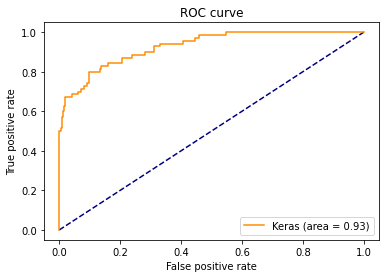

In [22]:
plt.figure()
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot(fpr, tpr, label='Keras (area = {:.2f})'.format(roc_auc), color='darkorange')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()